<a href="https://colab.research.google.com/github/mhz1123/internship/blob/master/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign for Banking Products**


---



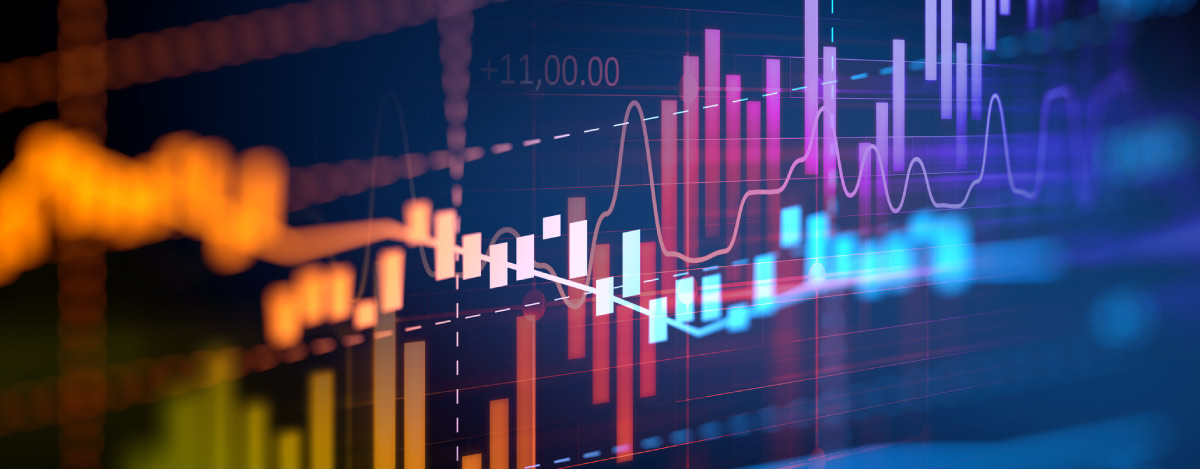

**Context:**

Bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.


**Objective**:

The classification goal is to predict the likelihood of a liability customer buying personal
loans.


**Step 1**

* Importing the required libraries

In [113]:
import numpy as np          # linear algebra
import pandas as pd         # data processing
import seaborn as sns       #visualisation
import matplotlib.pyplot as plt       #visualisation
%matplotlib inline
sns.set(style="ticks")
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score,log_loss
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# reading data from the dataset file
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')

* printing first 10 rows of the data to see how its structured
* and last 10 rows also

In [3]:
#first 10 rows of the dataset
data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
#last ten rows of the dataset
data.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.000000,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.900000,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800000,1,0,0,0,0,1,1


* attributes or features of the dataset(column names)

In [5]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


*  The data has 5000 rows and 13 columns/features
*  All the features are of numerical data type
* it shows that the data is a pandas dataframe with 5000 entries
* data types of values of features in the data are float and integer

In [7]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


* descriptive stats. (central tendencies) gives us insight about the data
* about its distribution and its nature

* Since our target variable is Personal Loan Column, that is, we have to predict if certain customer will accept the bank loan or not, hence,
* find the no of people who accepted the loan offer in the last campaing

In [8]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [9]:
# shape of the data or dimensionality of the dataset
data.shape

(5000, 14)

**Inference**

Among these 5000 customers, only 9.6% accepted the personal loan that was
offered to them in the earlier campaign.

Only 10.4% have securities account 

Only 6.04%  have a certificate of deposit (CD) account with
the bank

59.6% use online banking facalities

29.4% use a credit card issued by the bank

*  Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

*  Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median.

*  Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

*  CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

*  Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

*  The variables family and education are ordinal variables. The distribution of families is evenly distributes

*  Personal loan is the target column where it gives two values 1(means  this customer accepted the personal loan offered in the last campaign) and 0( means  this customer did not accept the personal loan offered in the last campaign

*  In the entire dataset only 480 accepted the loan offer in the last campaing

 **Information on the features or attributes.** 

**The attributes can be divided accordingly :**

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

**The binary category have five variables as below**:

>**Personal Loan** - Did this customer accept the personal loan offered in the last campaign? *This is our target variable*

>**Securities Account** - Does the customer have a securities account with the bank?

>**CD Account** - Does the customer have a certificate of deposit (CD) account with the bank?

>**Online** - Does the customer use internet banking facilities?

>**Credit Card** - Does the customer use a credit card issued by UniversalBank?


**Interval variables are as below:**

>**Age** - Age of the customer

>**Experience** - Years of experience

>**Income** - Annual income in dollars

>**CCAvg** - Average credit card spending

>**Mortage** - Value of House Mortgage

**Ordinal Categorical Variables are:**

>**Family** - Family size of the customer

>**Education** - education level of the customer

**The nominal variable is :**

>ID

>Zip Code



 **Step 2**

Checking, if there is anything to clean in the data

* checking if there are any null values in the data(if any impute them with median, not mean as it is very sensitive to outliers)

In [10]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

*  no null values found hence no imputation needed

In [ ]:
data.describe()

*  Here we can see that experience is not that use full for our model, so, we can neglect it, but first lets check its correlation with age as it seems to highly correlate with age
*  And also id column as it does not help the model either, as discussed earlier

In [ ]:
exp=data['Experience']
age = data['Age']
correlation= exp.corr(age)
correlation

*  very high correlation in age and experience columns hence droppping the experience column as it is kind of use less in this case.
*   hence dropping irrelevant columns
* the Id column is also not so usefull for our model as it is some unique number given to a customer to identify him or her, hence dropping ID column also

In [33]:
# deleting the id and experience columns
data = data.drop(['ID','Experience'],axis=1)
data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


*  Now, as the data is cleaned, let's move on to EDA

**Step 3**


**EDA**

* exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods

* finding the number of unique values in the data for each column

In [11]:
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

*  This shows the number of unique values in each column

* number of people with zero mortgage

In [12]:
data.query('Mortgage == "0"').Mortgage.count()

3462

* number of people with zero average spending on credit cards per month ($000)

In [13]:
data.query('CCAvg == "0"').CCAvg.count()

106

* value count of all columns, i.e, frequency of values occuring in the columns

In [14]:
for column in data.columns:
     print("\n" + column)
     print(data[column].value_counts())



ID
2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64

Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4    

*  From the above data we get a very good knowledge about the data

For example:

>3530 use credit card issued by the bank and 1470 dont

>2984 use online banking facilities and 2016 dont

>480 accepted the personal loan offered in the last
campaign

etc.

**Univariate Analysis**

*  Analysis done based only on one variable.

**Distribution Plot**
*  Distribution plot gives the density of distributions from point to point in general term


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


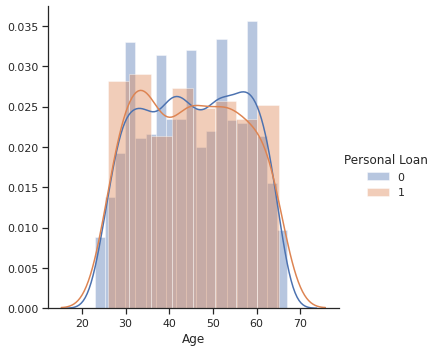

In [15]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"Age").add_legend()

* people having age between 25 to 35 tend to accept the loan offer(rough inference)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


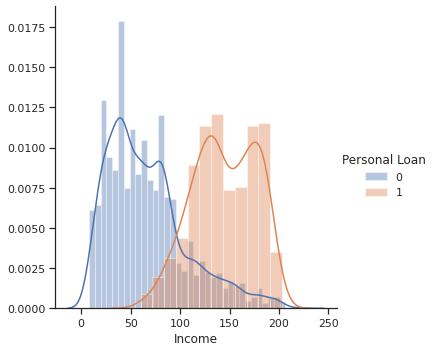

In [16]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"Income").add_legend()

*  some people with income less than 100K dont take loans
* people with income below 50K-52K dont accept loan offers at all
* But people with income greater than 120K upto 180K tend to accept the loan offer
* Also, the income data is not normally dirtributed, its positively skewed

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


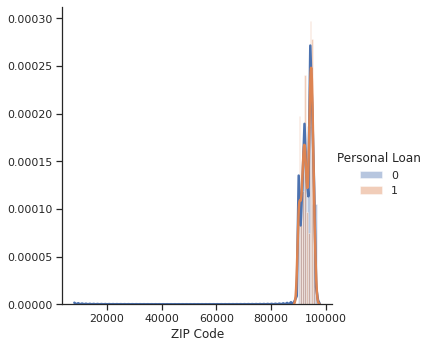

In [38]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"ZIP Code").add_legend()

* ZIP Code is not so use full for our model
* It is right that using this variable, we can see the correlation between location and personal loan acceptance rate, but as we have seen earlier that it conatains a lot of unique values(467) which will need one hot encoding to make it a usefull feature, but it will create a new problem of multicollinearity.
* Hence we should drop the ZIP Code column

In [ ]:
data = data.drop(['ZIP Code'],axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


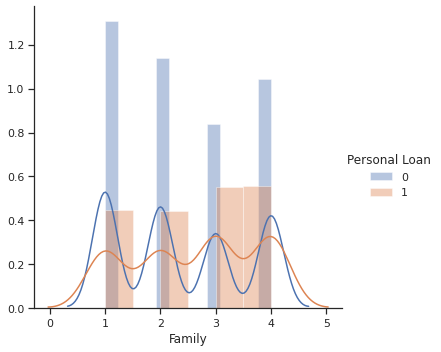

In [18]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"Family").add_legend()

* person having family size 1, 2 and 4 usually dont accept the loan offer 
* And families with size 3 are more likely to accept the loan offer

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


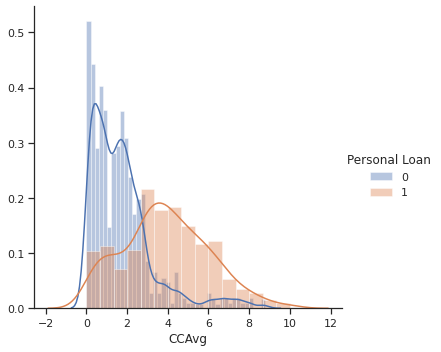

In [19]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"CCAvg").add_legend()

* people with average spending from credit card above 3K accepted the loan offer in the last campaing
* people with average spending less than tend to regect the loan offer
* The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.
* Also, the CCAvg data is not distributed normally

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


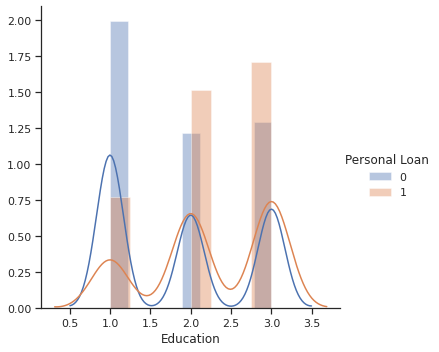

In [21]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"Education").add_legend()

* people with education level 1 usually dont accept the loan offer

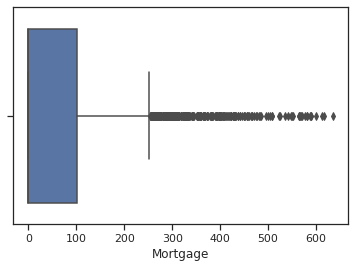

In [20]:
sns.boxplot(data['Mortgage'])

* we can see a lot of outliers in the mortgage data

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


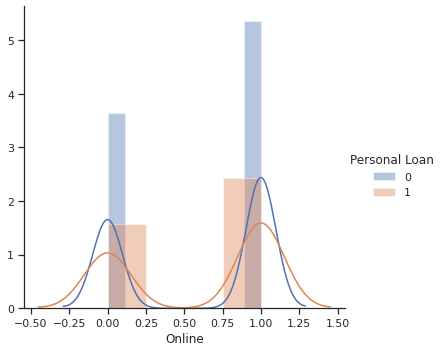

In [25]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"Online").add_legend()

* people using online banking facilities accept the loan offer more than who dont use it

In [ ]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan')

**Inference**: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as wel

**Bivariate Analysis**
* this gives the relation ship between the two variables

lets see if there is any relation between average amount spend and loan acceptance

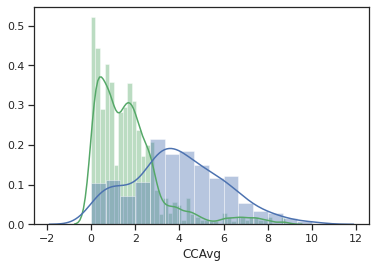

In [24]:
sns.distplot( data[data['Personal Loan'] == 0]['CCAvg'], color = 'g')
sns.distplot( data[data['Personal Loan'] == 1]['CCAvg'], color = 'b')

**Inference**: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information

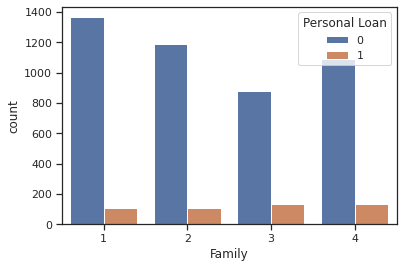

In [26]:
sns.countplot(x='Family',data=data,hue='Personal Loan')

* Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan(as discussed earlier). When considering future campaign this might be good association

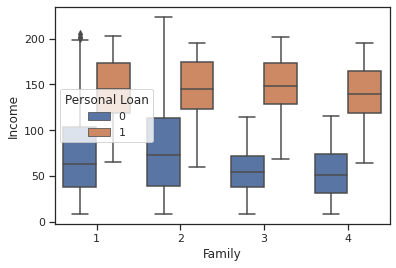

In [27]:
sns.boxplot(x=data.Family,y=data.Income,hue="Personal Loan",data= data )

* families with income less than 100K are less likely to take loan,than families with high income

**Multivariate Analysis**
* **Pair Plot:**
* pair plot shows a clear and nice view of all variables and their realtion ship with all other variables.

In [ ]:
sns.pairplot(data, hue="Personal Loan", height =3)
plt.show()

* the above analysis is just for representation purpose. All the inferences that can be drawn from these relations are observed earlier

**Correlation usig heat map**

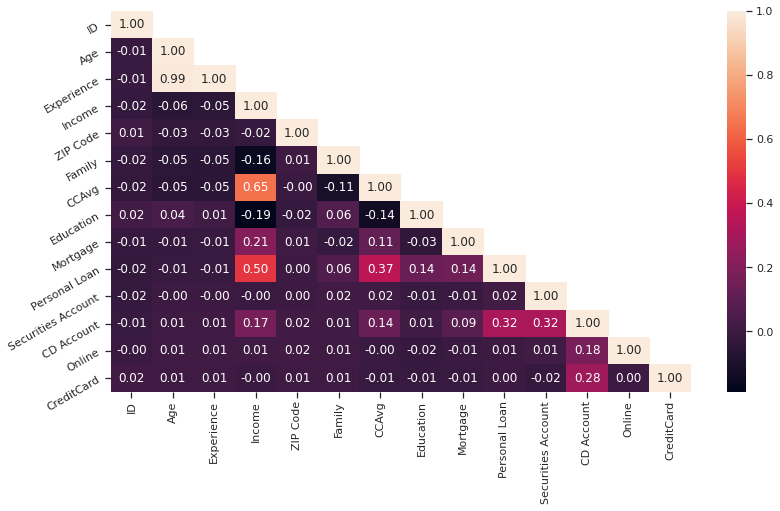

In [28]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

* Income and CCAvg is moderately correlated and should be kept in mind when building our model and also by the bank

**Step 4**
* Applying necessary transformations to feature variables


* Since our target variable is Personal Loan column, we should separate it from other feature columns so that we can apply necessary transformations to feature variables only

In [67]:
x=data.loc[:, data.columns != "Personal Loan"]  # x contains only feature columns 
y=data["Personal Loan"] # y contains only target column

* lets check the dimensions of separated datasets

In [68]:
x.shape,y.shape

((5000, 10), (5000,))

In [69]:
x.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,6.593348,4,0.845150,1,0,1,0,0,0
1,45,5.690317,3,0.814468,1,0,1,0,0,0
2,39,3.421134,1,0.633771,1,0,0,0,0,0
3,35,8.631223,1,1.107409,2,0,0,0,0,0
4,35,6.374882,4,0.633771,2,0,0,0,0,1


* Transforming feature variables Income and CCavg, because we know from previous analysis that those data columns are skewed and models like logistic regression converge more efficiently on normally distributed data

**Transforming feature variables**
*We will apply yeo-johnson power transformation, because if we apply box-cox tranformation it can only handle positive values. But yeo-johnson method can handle both positive and negative values(hence there is an advantage in using yeo-johnson method

applying power transformation to income data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


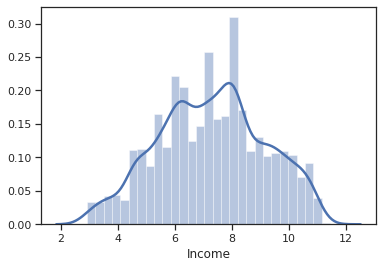

In [70]:
power_income= PowerTransformer(method='yeo-johnson',standardize=False)
power_income.fit(x['Income'].values.reshape(-1,1))
temp1=power_income.transform(x['Income'].values.reshape(-1,1))
x['Income']=temp1
sns.distplot(x['Income'])

* now the income data is almost normally distributed

* applying power transformation to CCAvg column

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


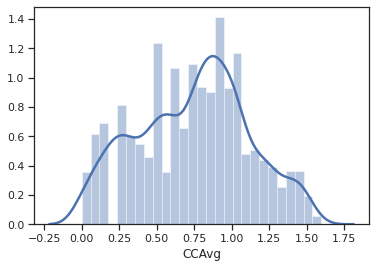

In [71]:
power_ccavg=PowerTransformer(method='yeo-johnson', standardize=False)
power_ccavg.fit(x['CCAvg'].values.reshape(-1,1))
temp2=power_ccavg.transform(x['CCAvg'].values.reshape(-1,1))
x['CCAvg']=temp2
sns.distplot(x['CCAvg'])

* now the CCAvg data is almost normally distributed

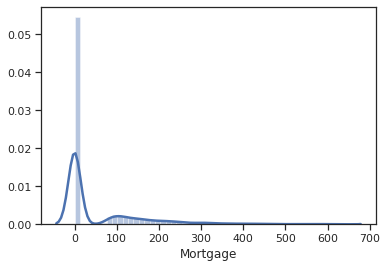

In [72]:
sns.distplot(x['Mortgage'])

* from above plot we can see that mortgage value is 0 for majority and then it is distributed upto 700(hence we can see a large number of outliers)
* Hence, we apply binning to the mortgage data to make it meaningfull

In [73]:
x['Mortgage_binned'] = pd.cut(x.Mortgage,
                               bins=[0,100,200,300,400,500,600,700],
                               labels=[0,1,2,3,4,5,6],
                               include_lowest=True)
x.drop('Mortgage', axis=1, inplace=True)

In [74]:
x.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_binned
0,25,6.590284,4,0.795211,1,1,0,0,0,0
1,45,5.687871,3,0.767726,1,1,0,0,0,0
2,39,3.420038,1,0.604072,1,0,0,0,0,0
3,35,8.626634,1,1.026918,2,0,0,0,0,0
4,35,6.371972,4,0.604072,2,0,0,0,1,0


In [75]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

**Step 5**

**Splitting the data into training dataset and testing dataset**

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.3, stratify = y, random_state=0)

**Step6**
* Using a Logistic Regression model to predict the likelihood of a customer buying **personal** loans

In [79]:
lr = LogisticRegression(C=1.0, max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
lr.score(X_test,y_test)

0.9526666666666667

In [86]:
lr.score(X_train,y_train)

0.956

**Step 7**
* Print all the metrics related for evaluating the model performance


In [ ]:
predict= lr.predict(X_test)

In [89]:
labels = ['wont accept loan','accept loan']

**confusion matrix**

In [91]:
cm = confusion_matrix(y_test, predict, labels=None)
cm

array([[1337,   19],
       [  52,   92]])

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

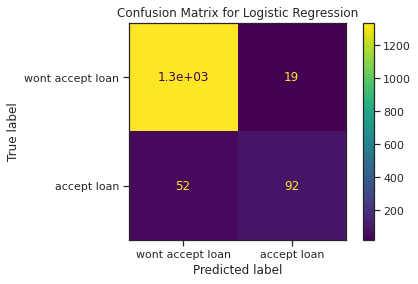

In [94]:
plot_confusion_matrix(lr, X_test, y_test, display_labels=labels)
plt.title('Confusion Matrix for Logistic Regression')

**Precision Score**

In [98]:
precision=precision_score(y_test,predict)
print('Precision: %f' %precision)

Precision: 0.828829


**Recall Score**

In [100]:
recall=recall_score(y_test,predict)
print('Recall: %f' % recall)

Recall: 0.638889


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

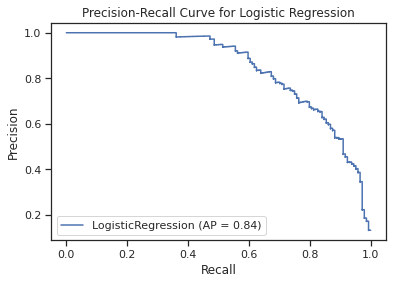

In [105]:
plot_precision_recall_curve(lr, X_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')

**F1 Score**

In [103]:
f1 = f1_score(y_test, predict)
print('F1 score: %f' % f1)

F1 score: 0.721569


**ROC Curve**

Text(0.5, 1.0, 'ROC Curve for Logistic Regression')

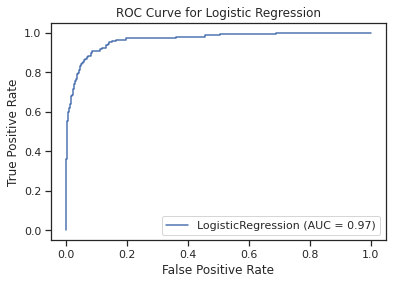

In [107]:
plot_roc_curve(lr, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')

* from the curve we can see that AUC = 0.97

**Log Loss**

In [111]:
accuracy = log_loss(y_test, predict)
print("Logloss: %.2f" % (accuracy))

Logloss: 1.63


# Inference of the Logistic Regression Model

* The Logistic Regression model works pretty fine for this dataset
* It has an accuracy of 0.953(test data) and 0.956(train data), that is 95% accuracy
* True positive cases: 1337 and False positive cases: 52

**Step 8**

**Building other models**

Decision Tree Classifier

In [114]:
dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [115]:
dt_model.score(X_test , y_test)

0.9766666666666667

In [116]:
dt_model.score(X_train , y_train)

0.976

In [118]:
predict_dt = dt_model.predict(X_test)

In [119]:
cm_dt= confusion_matrix(y_test, predict_dt, labels=None)
cm_dt

array([[1345,   11],
       [  24,  120]])

* The decision Tree Classifier has greater accuracy than the Logistic Regression model
* And the number of True Positive cases is 1345 and False positive cases is 24
* significantly better than logistic regression model

**Naive Bayes**

In [120]:
mod_nav = GaussianNB()
mod_nav.fit(X_train, y_train)

prediction = mod_nav.predict(X_test)
mod_nav.score(X_test,y_test)

0.9126666666666666

In [121]:
cm_nb= confusion_matrix(y_test, prediction, labels=None)
cm_nb

array([[1293,   63],
       [  68,   76]])

* this model performs worse than both logistic regression and decision tree classifier

**Random Forest Classifier**

In [123]:
rf_class = RandomForestClassifier(n_estimators=300, max_depth=8,n_jobs=-1 )
rf_class.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [124]:
rf_class.score(X_test,y_test)

0.9873333333333333

In [125]:
pred_rf=rf_class.predict(X_test)

In [126]:
cm_rf= confusion_matrix(y_test, pred_rf, labels=None)
cm_rf

array([[1354,    2],
       [  17,  127]])

* The random Forest Classifier out performs all the above models

**KNN**

In [129]:
knn = KNeighborsClassifier(n_neighbors= 20 , weights = 'uniform', metric='euclidean') # using euclidean distance formula
knn.fit(X_train, y_train)    
pred_knn = knn.predict(X_test)

In [131]:
knn.score(X_test,y_test)

0.9333333333333333

In [132]:
cm_knn= confusion_matrix(y_test, pred_knn, labels=None)
cm_knn

array([[1356,    0],
       [ 100,   44]])

* The KNN model has accuracy better than Naive Bayes but it is less than other models, viz. Random forest, Decision tree classifier and logistic regression

All the models and there respective comparison with other models in terms of accuracy are mentioned above.
* From all the above models Random Forest Classifier gives the best result.

**Step 9**

# Conclusion

#  Business understanding of the model

* The Target Variable correlates best with income and CCAvg columns,hence we can conclude that most important features are income of the customer and average spending on credit card per month and can help the bank save money and time in current and future campaings.
* The Bank is trying to convert its liabilty to its asset, that is, the bank wants its customers to become Borrowers. And they have the data from last Bussiness campaing about customers who accepted the loan offer and who didn't. hence, they need information about the connection between the variables given in the data
And hence we build and compare a number of machine learning models, that predict which customer will become an asset which can be of immense value for the bank, as for the current campaing they can approach only those customer who the model predicts to be assets.
From all the above models Random Forest Classifier algorithm have the highest accuracy and we can choose that as our final model